In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Import database

In [2]:
df = pd.read_csv('../data/Test O_G_Equipment_Data.csv', sep=';', decimal=',')
len(df)

800

In [3]:
df.head(3)

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.2352,47.6573,46.4418,64.8203,66.4545,44.4832,FALSO
1,2,2,4,60.8072,63.1721,62.0060,80.7144,81.2464,60.2287,FALSO
2,3,2,1,79.0275,83.0322,82.6421,98.2544,98.7852,80.9935,FALSO


### Target Var

In [4]:
df['Fail'].value_counts()

Fail
FALSO         734
VERDADEIRO     66
Name: count, dtype: int64

In [5]:
df['Fail'].value_counts(normalize=True)

Fail
FALSO         0.9175
VERDADEIRO    0.0825
Name: proportion, dtype: float64

In [6]:
df['Target'] = np.where(df['Fail'] == "VERDADEIRO", 1, 0)

#### Unique events of failure

In [10]:
df['previous_fail'] = df['Target'].shift(1, fill_value=0)
df['start_failure'] = (df['Target'] == 1) & (df['previous_fail'] == 0)

In [11]:
total_unique_failures: int = df['start_failure'].sum()
print(f"Total unique failure events: {total_unique_failures}")

Total unique failure events: 10


#### Defining types of columns

In [96]:
target_col = ['Target', 'Fail']
numeric_cols = df.select_dtypes(include=['float64']).columns
categorical_cols_int  = df.select_dtypes(include=['int']).drop('Target', axis = 1).columns
categorical_cols_string = df.select_dtypes(include=['object']).columns

In [97]:
print(numeric_cols)

Index(['Temperature', 'Pressure', 'VibrationX', 'VibrationY', 'VibrationZ',
       'Frequency'],
      dtype='object')


In [98]:
print(categorical_cols_int)

Index(['Cycle', 'Preset_1', 'Preset_2'], dtype='object')


In [99]:
categorical_cols_string

Index(['Fail'], dtype='object')

In [100]:
print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns (int): {len(categorical_cols_int)}")
print(f"Categorical columns (string): {len(categorical_cols_string)}")

Numeric columns: 6
Categorical columns (int): 3
Categorical columns (string): 1


### Understand data

In [45]:
df.describe()

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,1.988750,4.551250,69.263493,78.997944,73.860273,72.786877,71.866213,68.223448
std,231.0844,0.805875,2.293239,25.536251,32.501834,31.229629,32.739745,27.844618,29.138704
min,1.0000,1.000000,1.000000,2.089400,3.480300,3.846300,10.057700,18.784200,4.380100
25%,200.7500,1.000000,3.000000,51.040125,55.508550,50.752450,48.524000,50.787625,45.861725
50%,400.5000,2.000000,5.000000,65.906700,75.014850,69.394950,65.504750,69.319250,65.664300
75%,600.2500,3.000000,7.000000,80.527225,99.302500,90.195050,94.075600,88.891225,90.097425
max,800.0000,3.000000,8.000000,255.607800,189.995700,230.861100,193.569900,230.951100,178.090300


#### Machine configurations include preset_1 = 1, 2, 3
#### Machine configurations include presets_2 =  1 to 8 

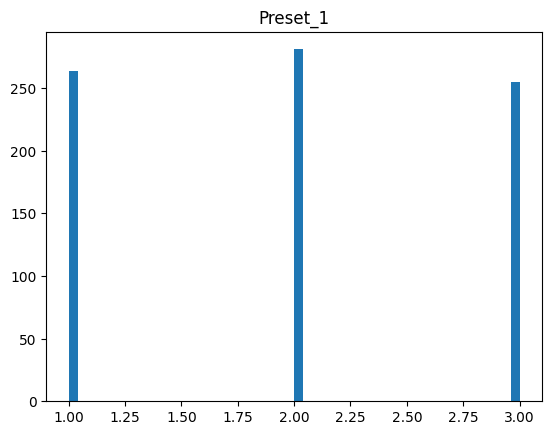

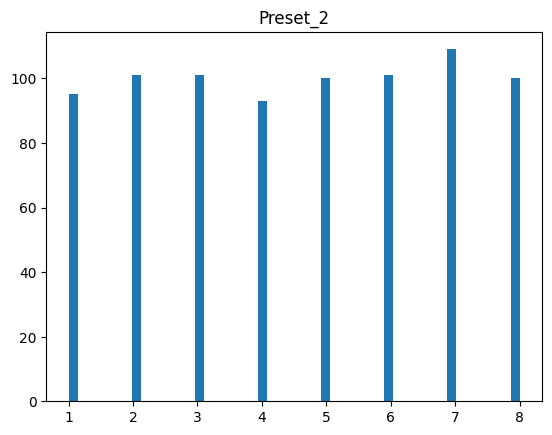

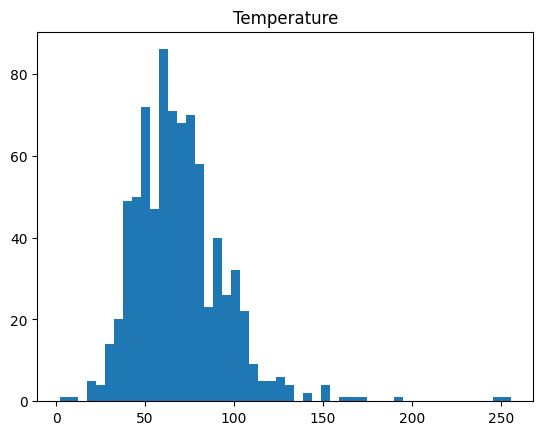

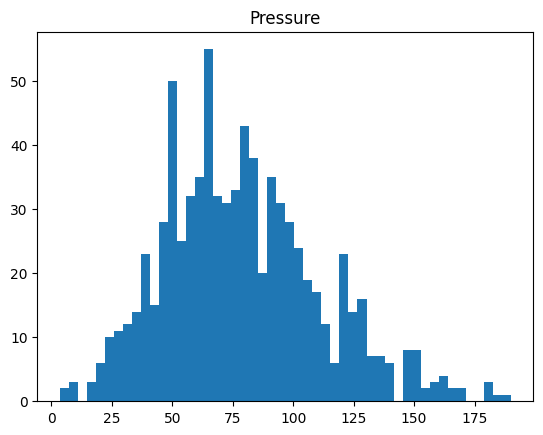

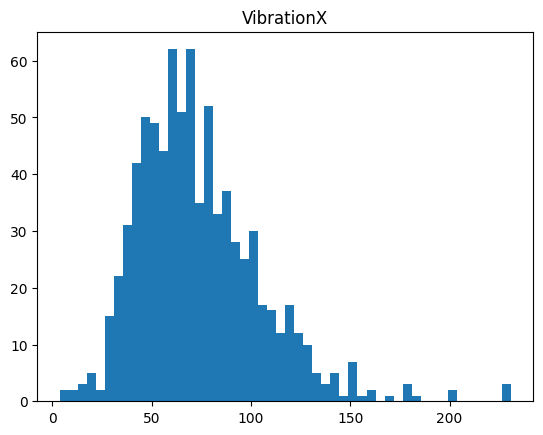

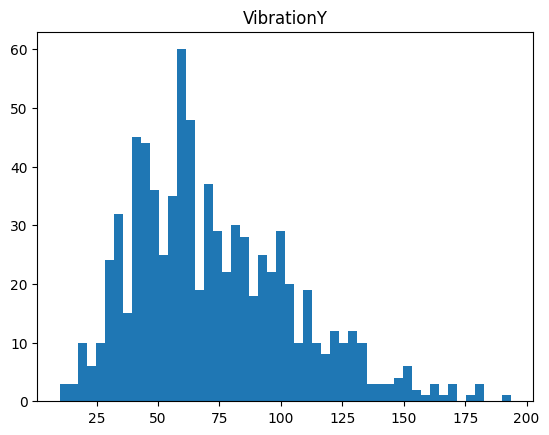

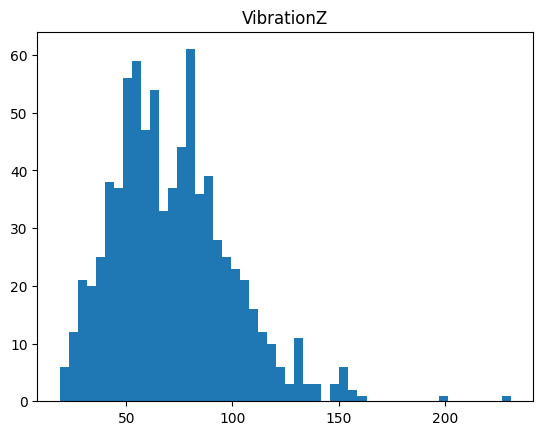

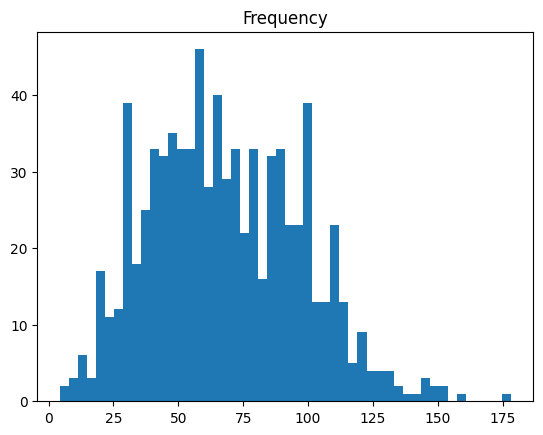

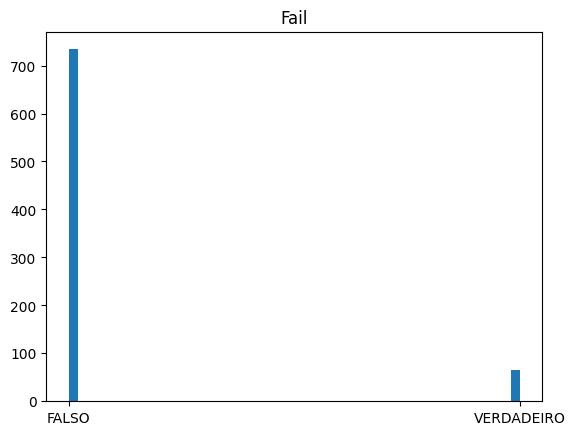

In [46]:
for i in df.columns.drop('Cycle'):
    plt.hist(df[i].dropna(), bins=50)
    plt.title(i)
    plt.show()

### Crosstabs

In [49]:
df.columns

Index(['Cycle', 'Preset_1', 'Preset_2', 'Temperature', 'Pressure',
       'VibrationX', 'VibrationY', 'VibrationZ', 'Frequency', 'Fail'],
      dtype='object')

In [55]:
pd.crosstab(df['Preset_1'], df['Preset_2'])

Preset_2,1,2,3,4,5,6,7,8
Preset_1,,,,,,,,
1,34,38,43,22,31,34,38,24
2,30,34,26,40,40,37,37,37
3,31,29,32,31,29,30,34,39


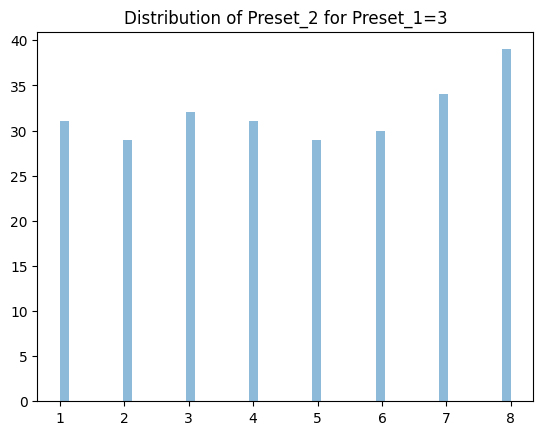

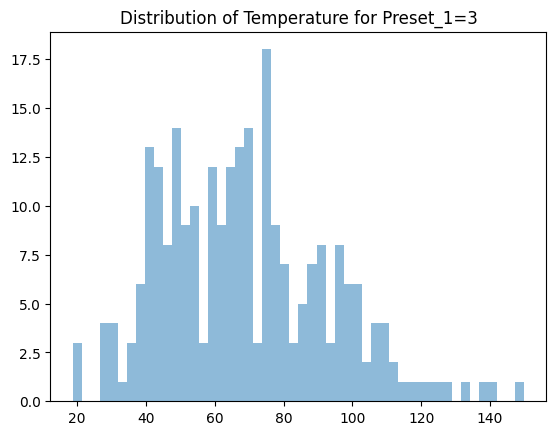

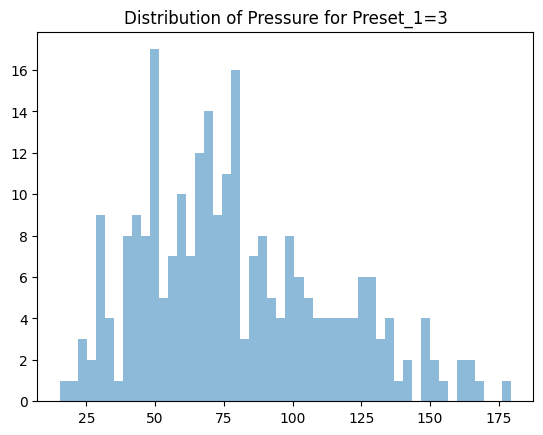

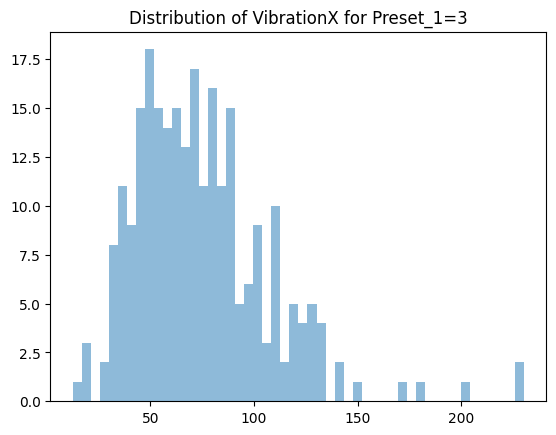

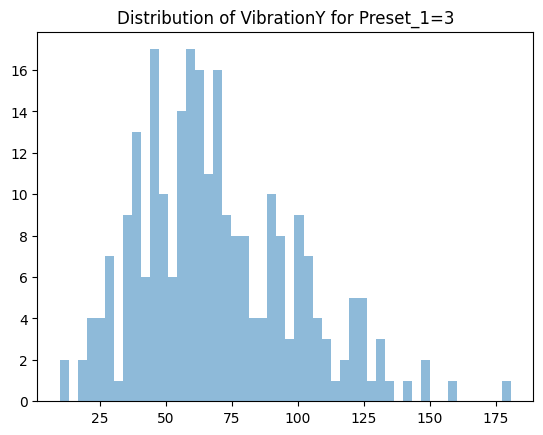

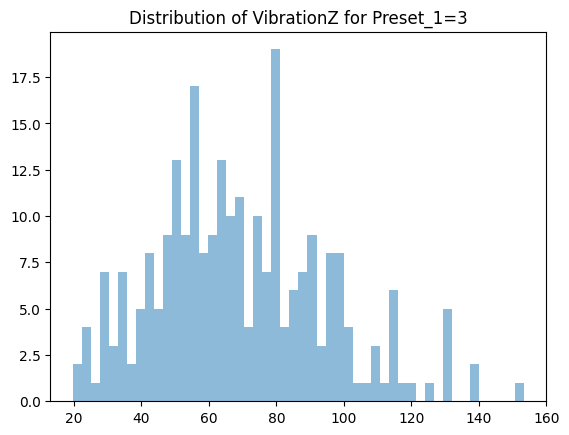

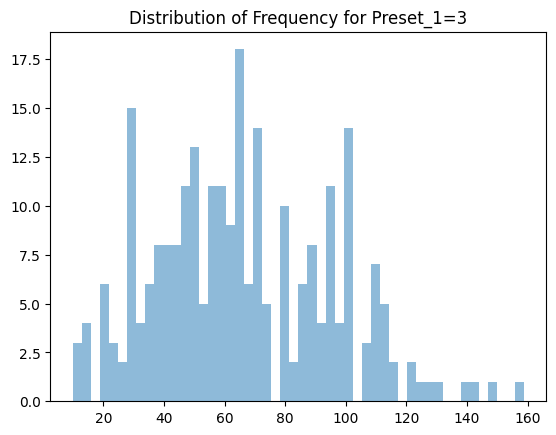

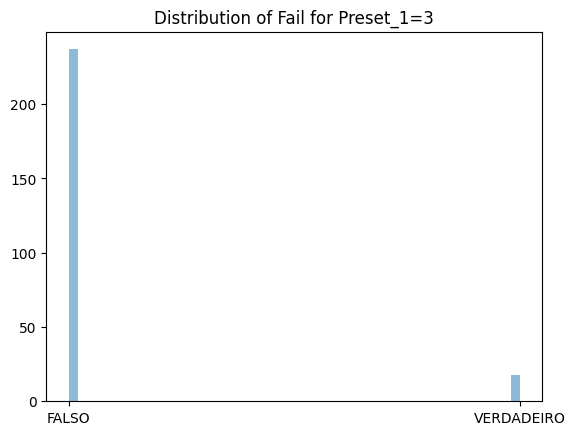

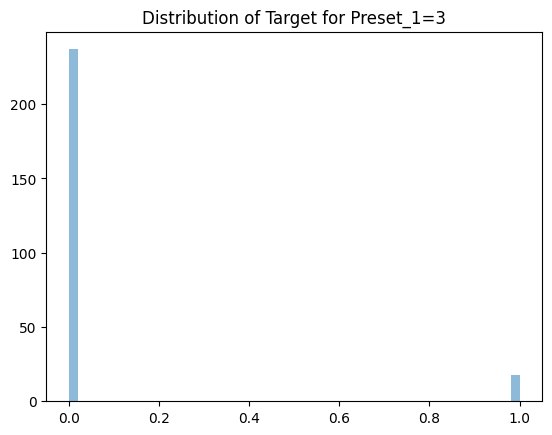

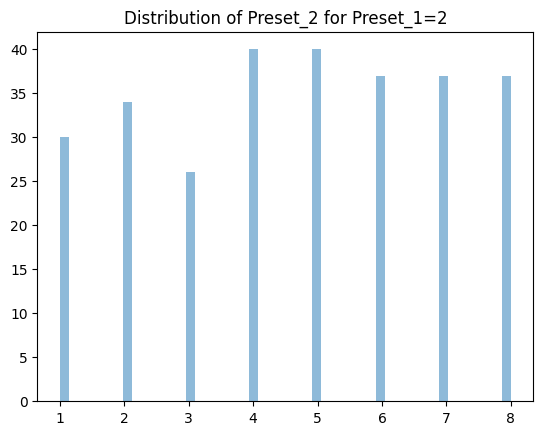

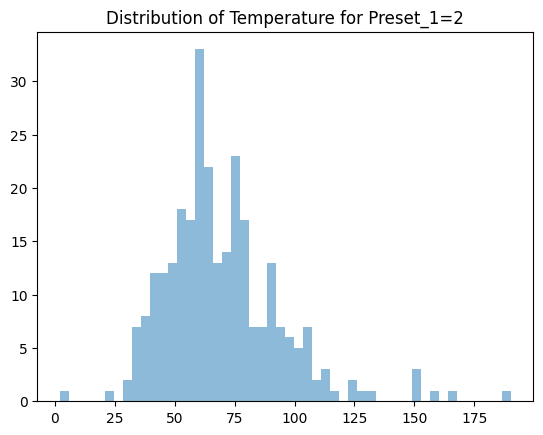

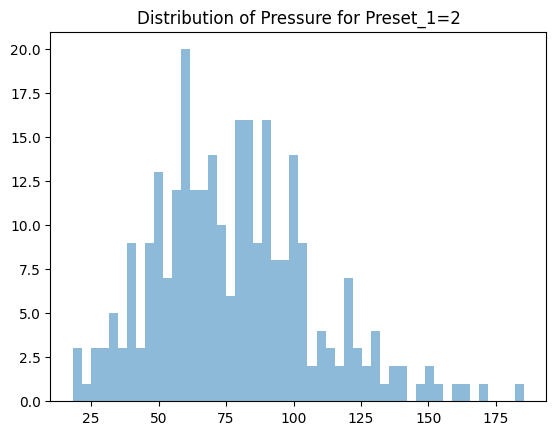

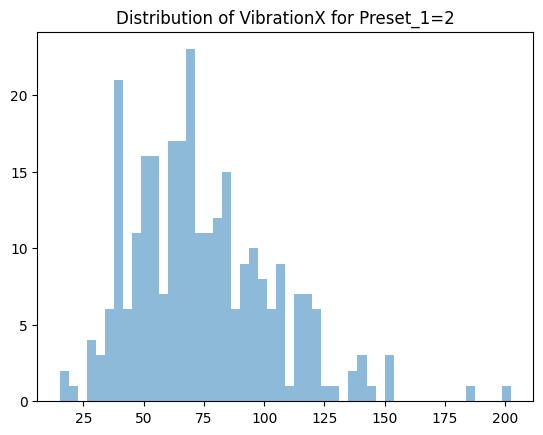

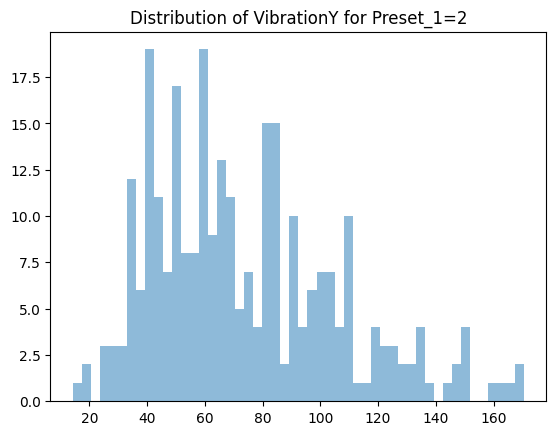

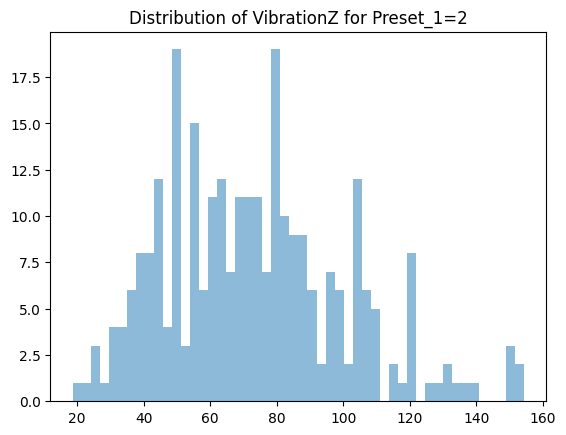

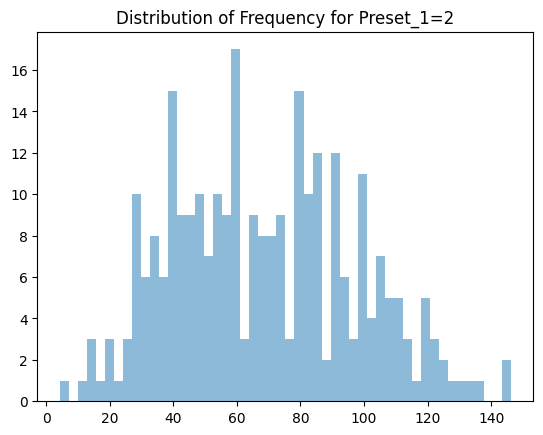

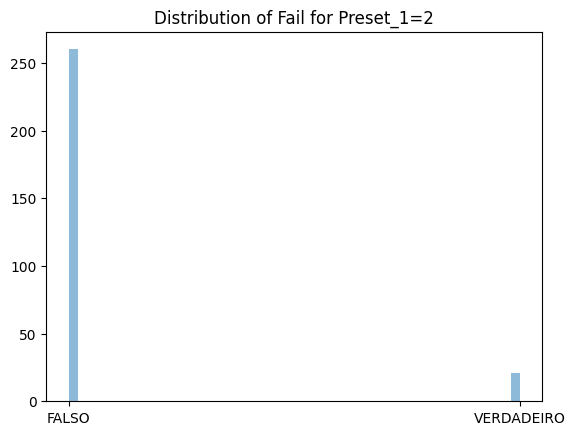

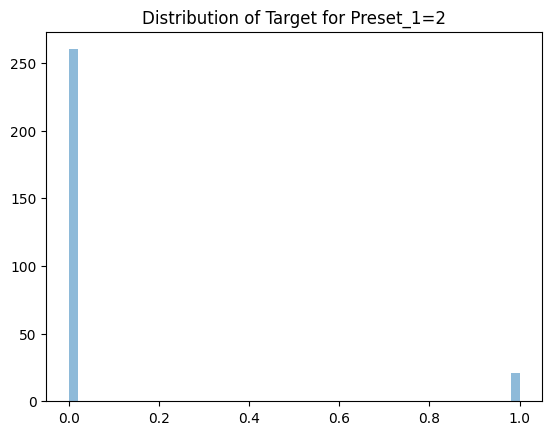

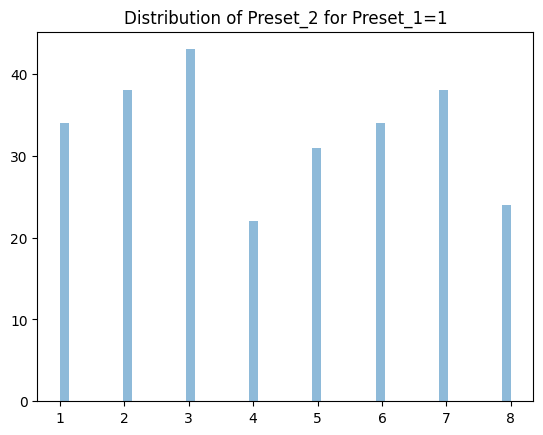

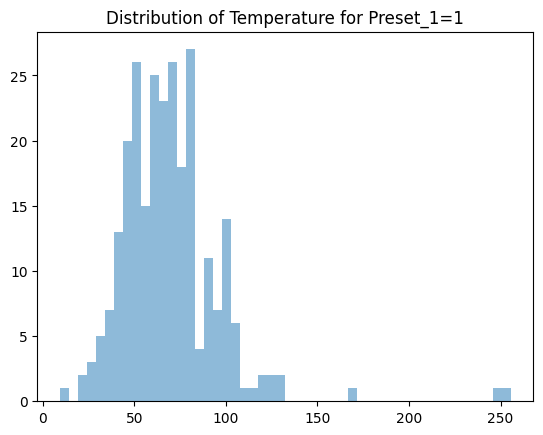

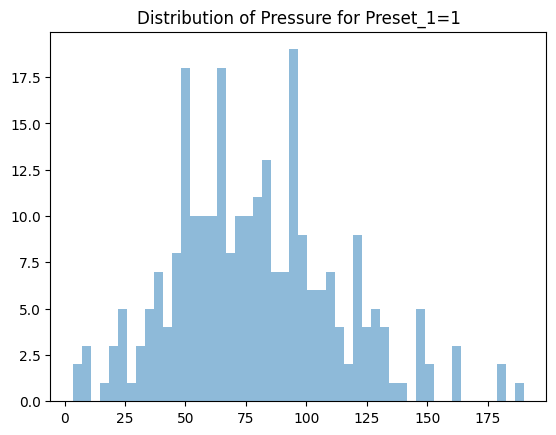

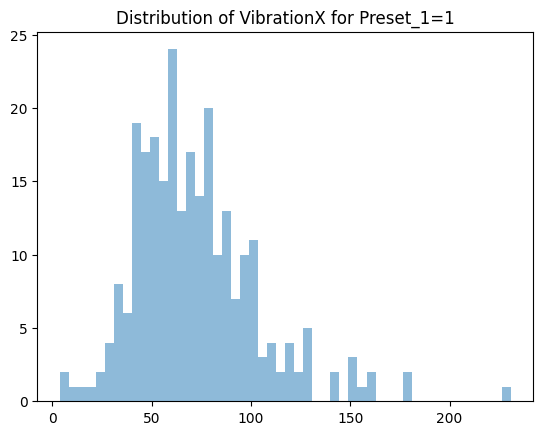

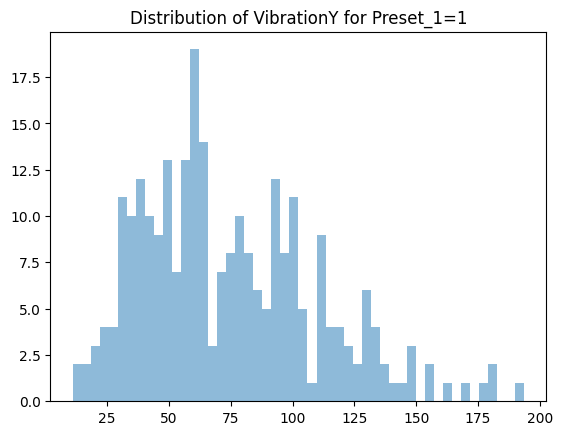

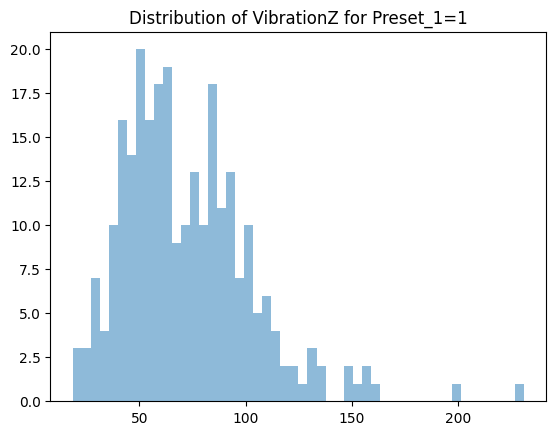

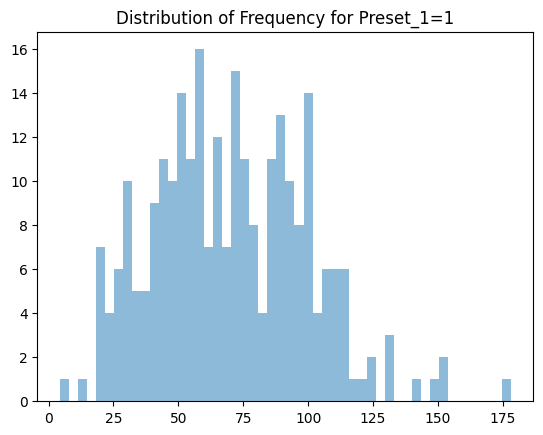

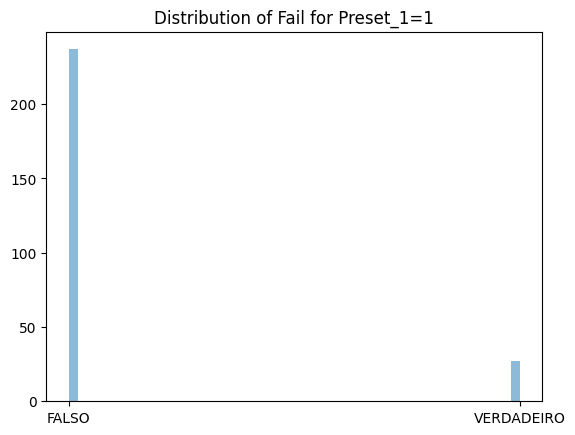

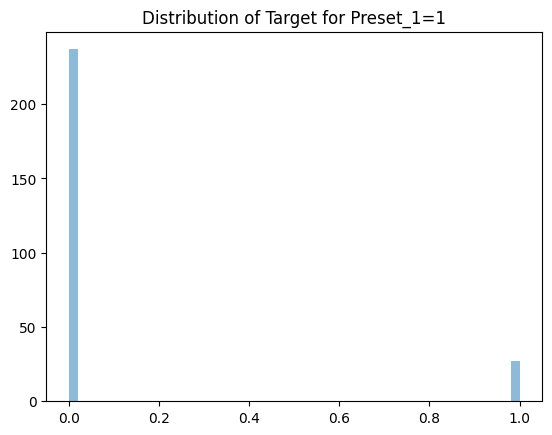

In [61]:
for i in df['Preset_1'].unique():
    subset = df[df['Preset_1'] == i]
    for j in df.columns.drop(['Cycle', 'Preset_1']):
        plt.title(f'Distribution of {j} for Preset_1={i}')
        plt.hist(subset[j].dropna(), bins=50, alpha=0.5, label=f'Preset_1={i}')
        plt.show()

### Correlations

In [62]:
df.columns

Index(['Cycle', 'Preset_1', 'Preset_2', 'Temperature', 'Pressure',
       'VibrationX', 'VibrationY', 'VibrationZ', 'Frequency', 'Fail',
       'Target'],
      dtype='object')

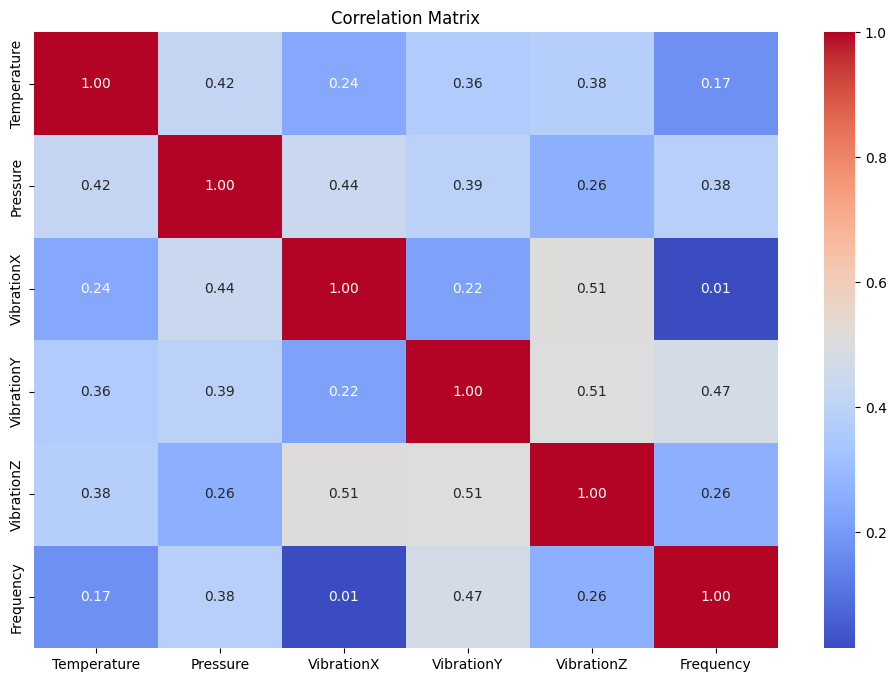

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### No strong correlation between numerical variables, except vibrations (0.51)

### Checking distributions for Preset 1

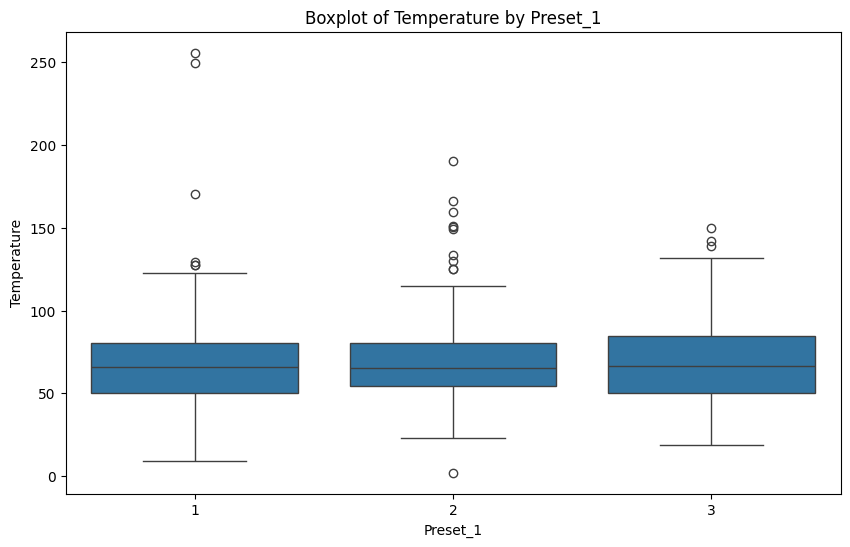

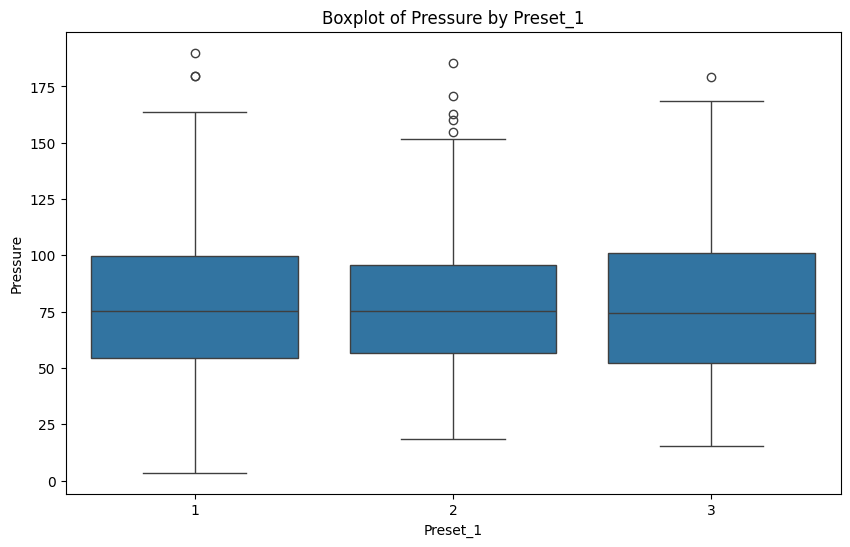

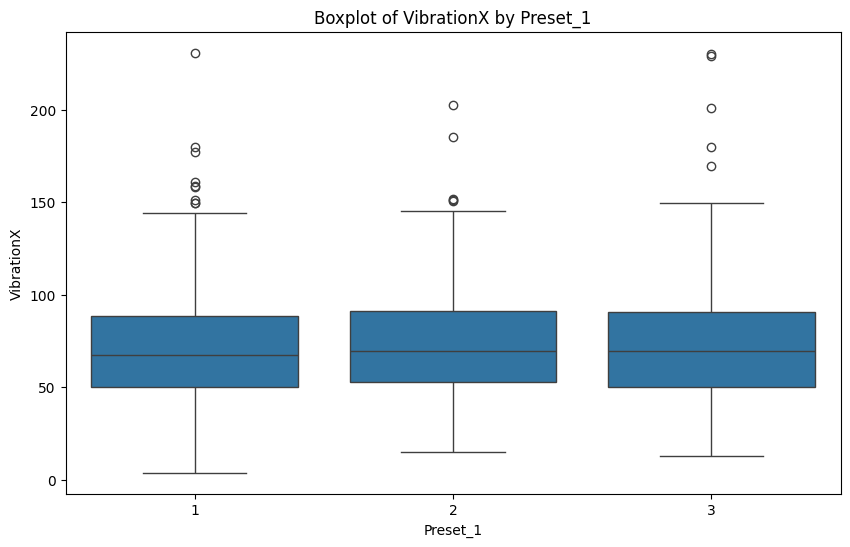

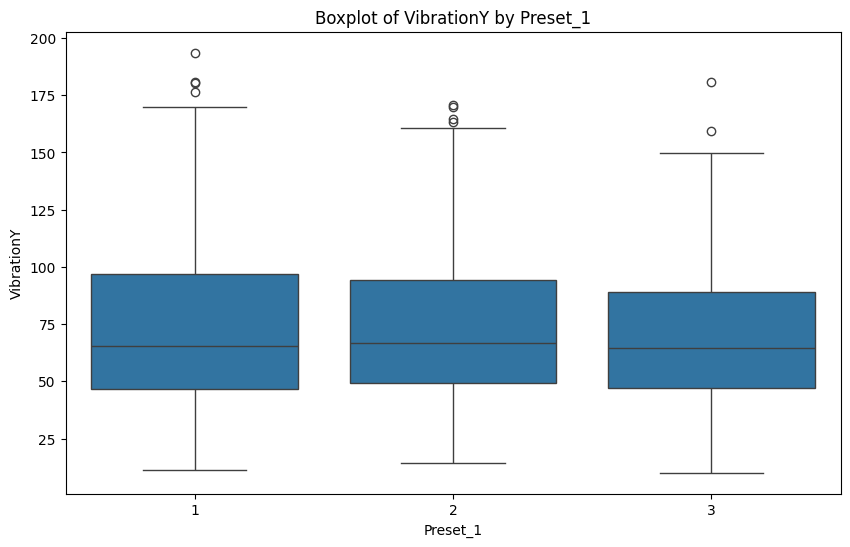

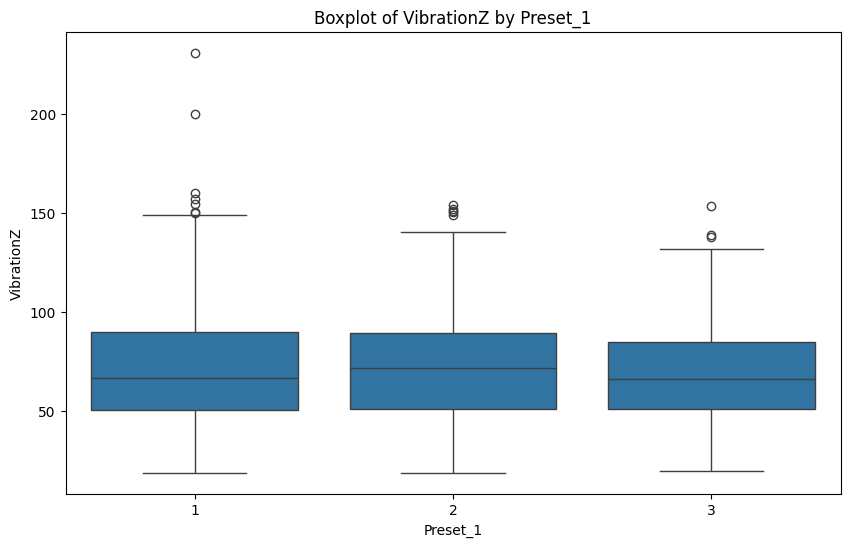

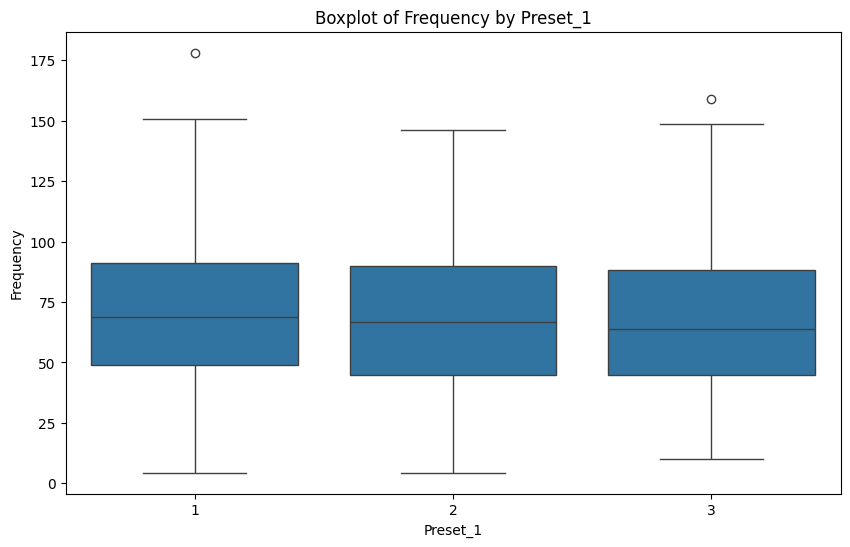

In [74]:
for i in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Preset_1', y=i, data=df)
    plt.title(f'Boxplot of {i} by Preset_1')
    plt.show()

#### Checking distributions for Preset_2

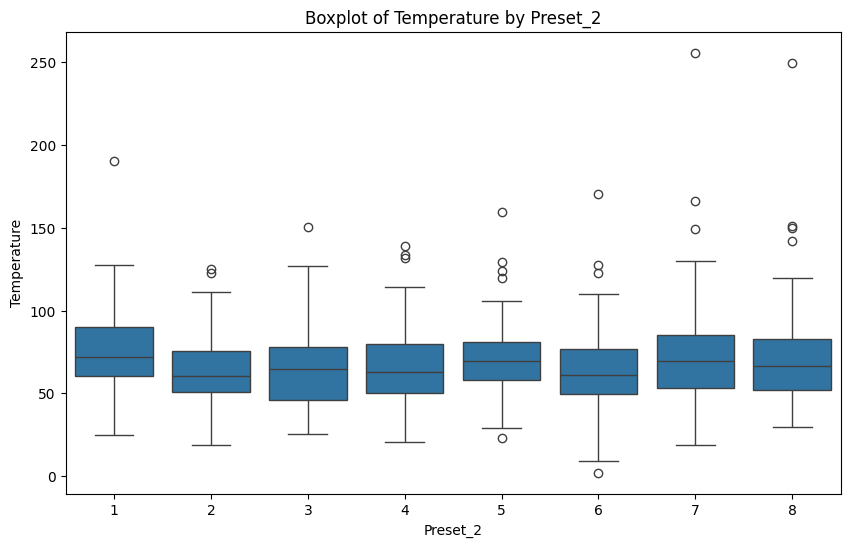

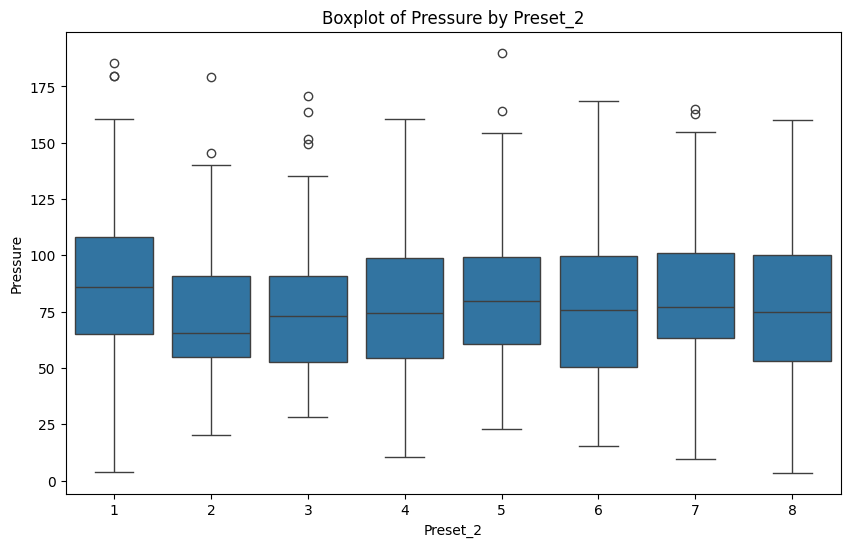

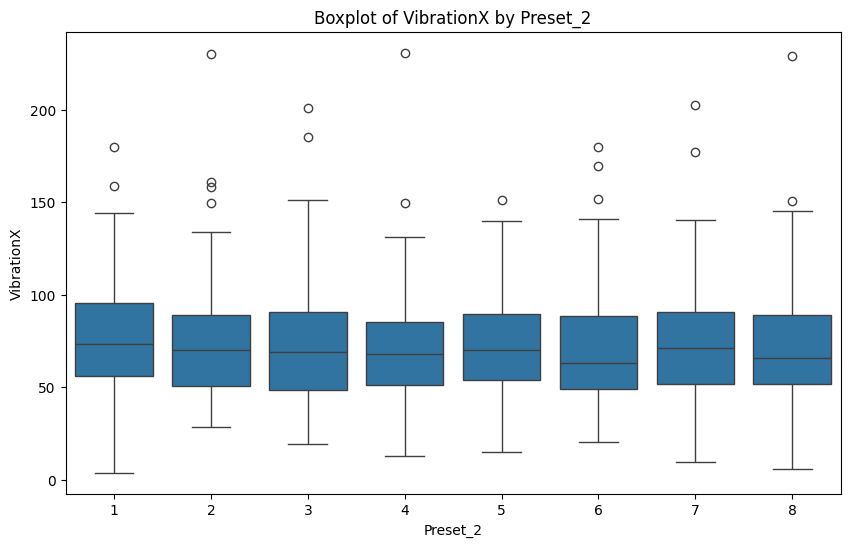

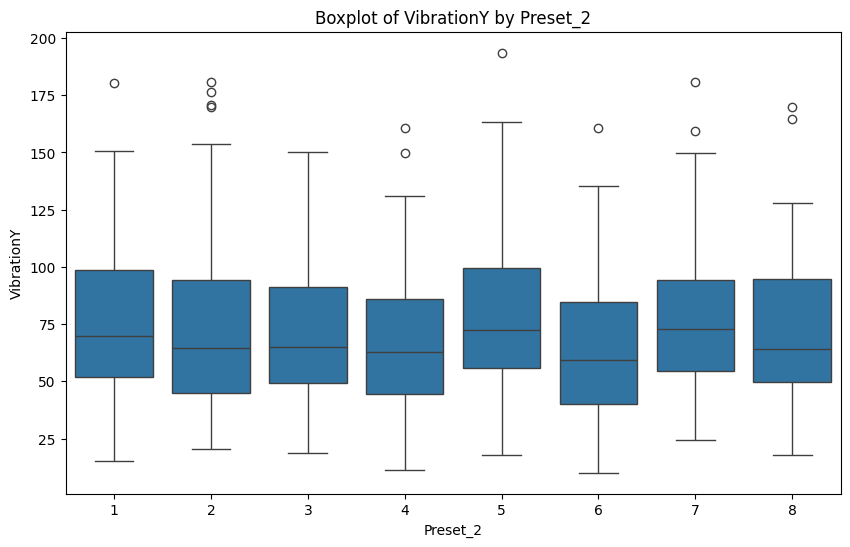

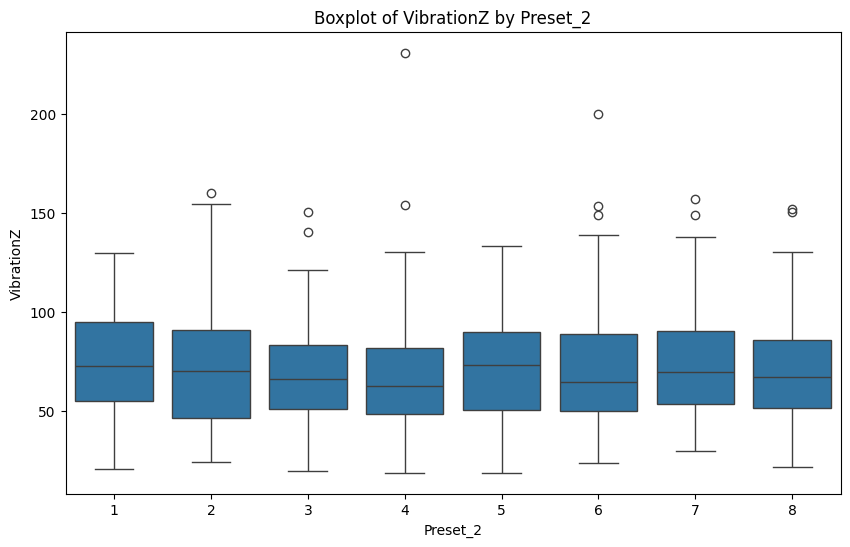

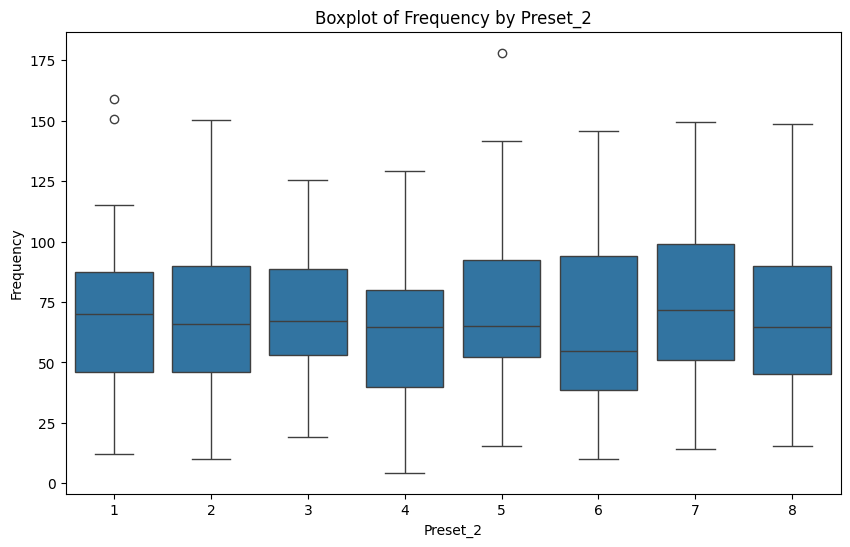

In [75]:
for i in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Preset_2', y=i, data=df)
    plt.title(f'Boxplot of {i} by Preset_2')
    plt.show()

#### First impressions: variables like temperature, vibrations and preassure have slightly more variations between values of Preset_2

## Checking Variables against Target Variable

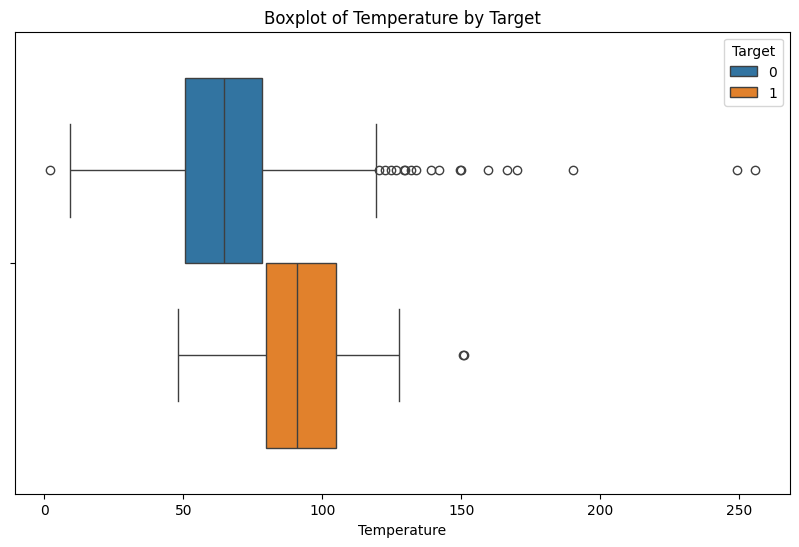

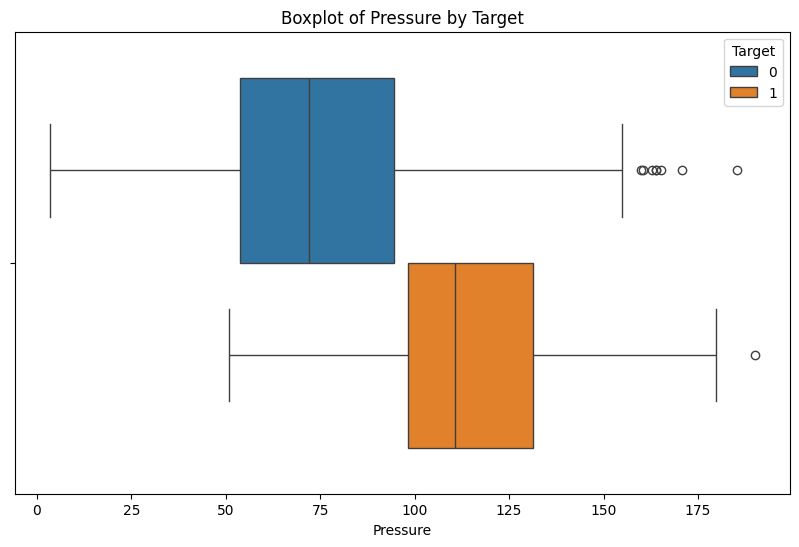

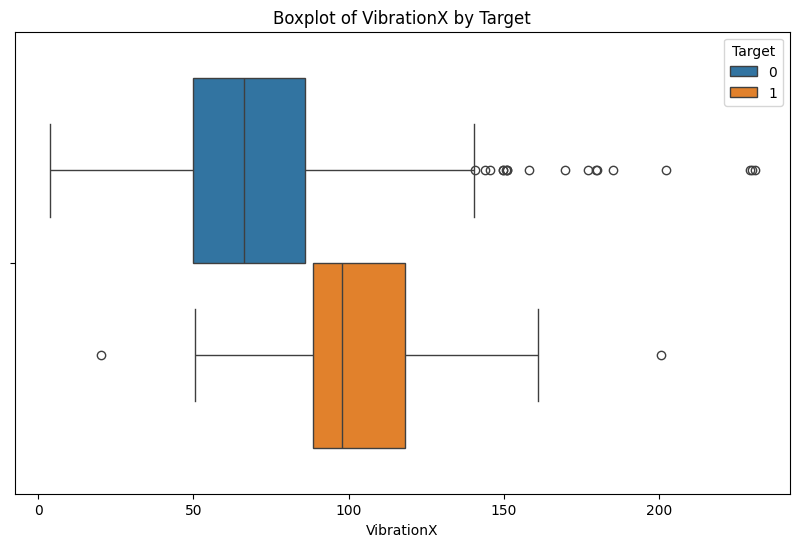

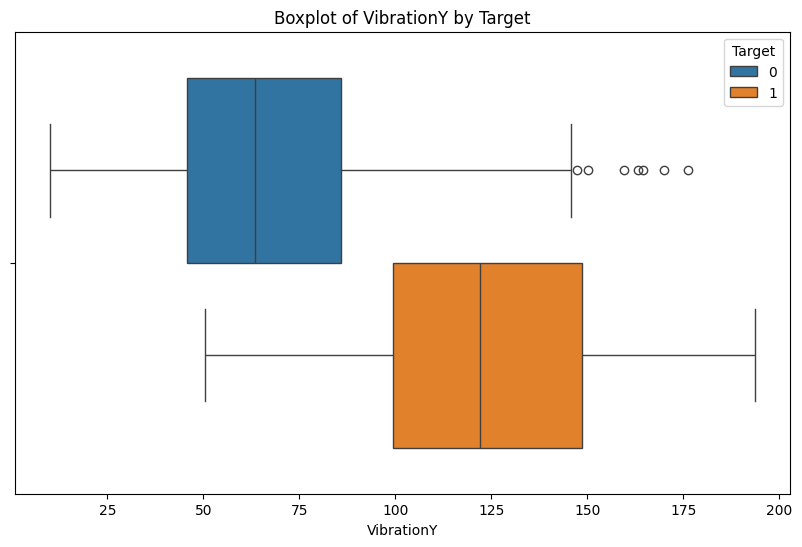

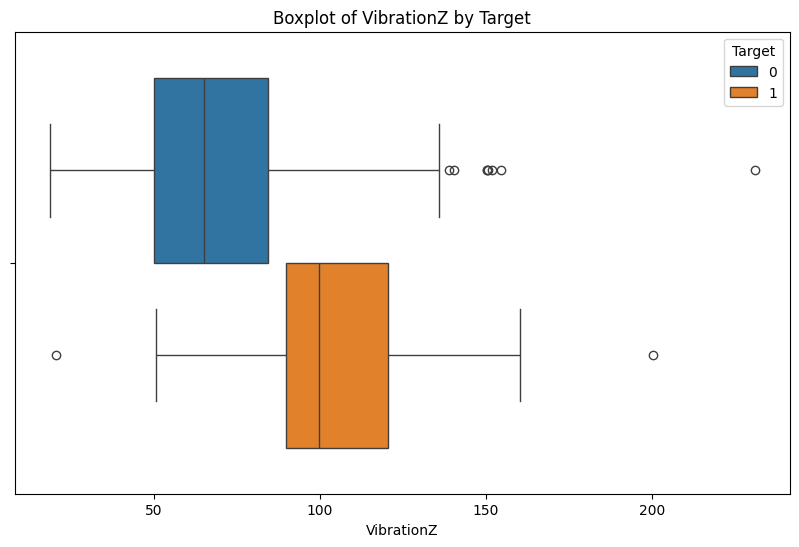

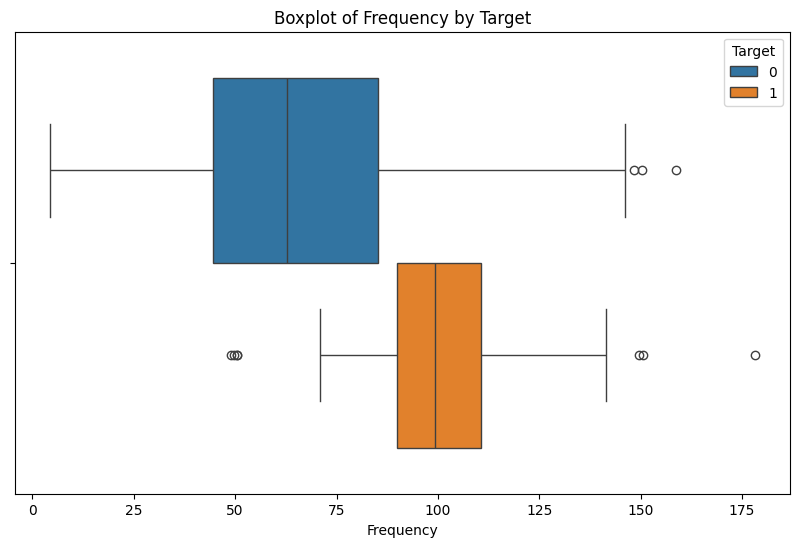

In [78]:
for i in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(hue='Target', x=i, data=df)
    plt.title(f'Boxplot of {i} by Target')
    plt.show()

#### All numeric variables show higher values when the Status of the machines are Fail

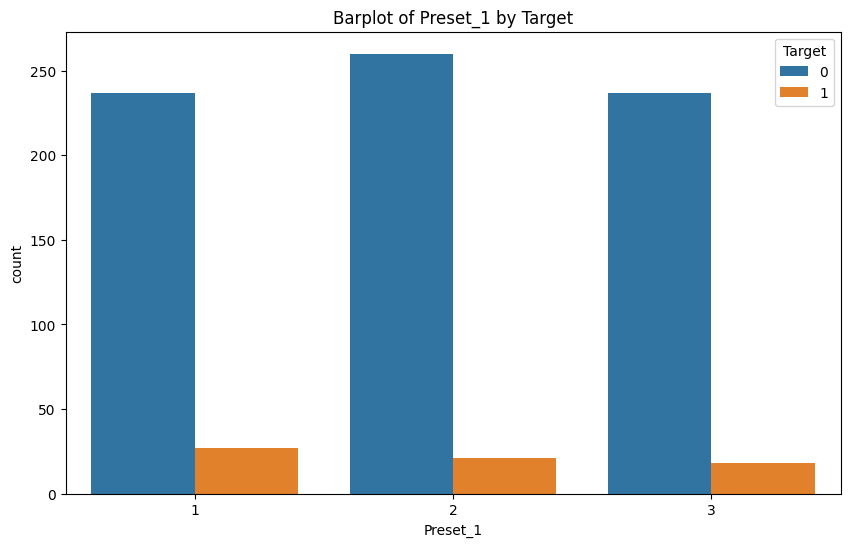

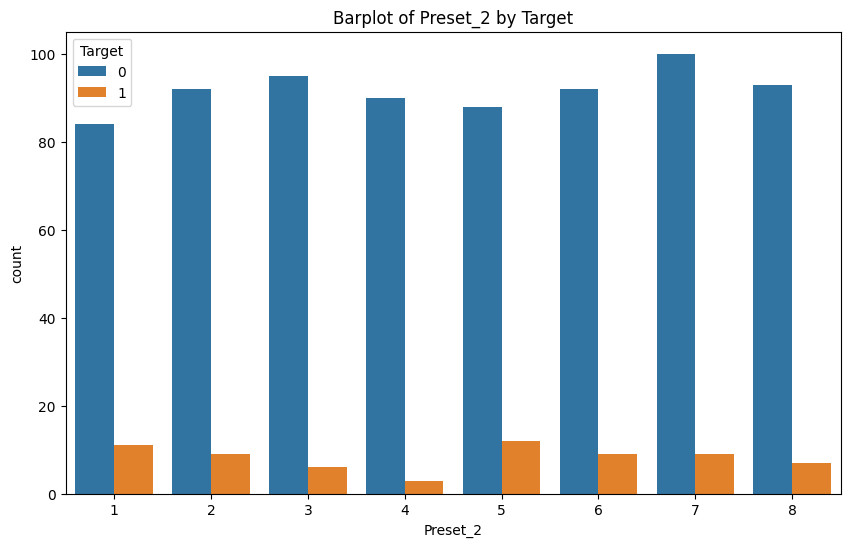

In [103]:
for i in categorical_cols_int.drop('Cycle'):
    plt.figure(figsize=(10,6))
    sns.countplot(hue='Target', x=i, data=df)
    plt.title(f'Barplot of {i} by Target')
    plt.show()

In [104]:
df['Preset_combined'] = df['Preset_1'].astype(str) + '_' + df['Preset_2'].astype(str)
df['Preset_combined'].value_counts()

Preset_combined
1_3    43
2_5    40
2_4    40
3_8    39
1_7    38
1_2    38
2_7    37
2_8    37
2_6    37
2_2    34
1_6    34
1_1    34
3_7    34
3_3    32
3_1    31
3_4    31
1_5    31
2_1    30
3_6    30
3_5    29
3_2    29
2_3    26
1_8    24
1_4    22
Name: count, dtype: int64

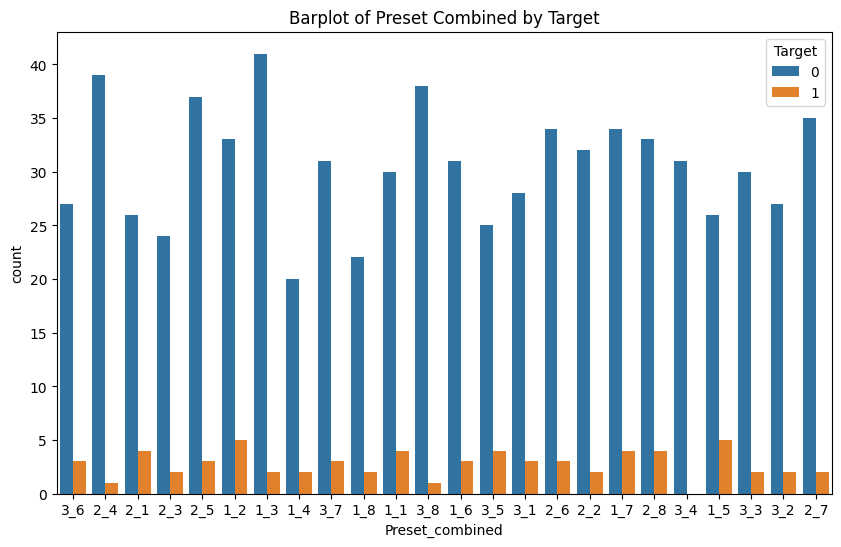

In [105]:
plt.figure(figsize=(10,6))
sns.countplot(hue='Target', x='Preset_combined', data=df)
plt.title(f'Barplot of Preset Combined by Target')
plt.show()

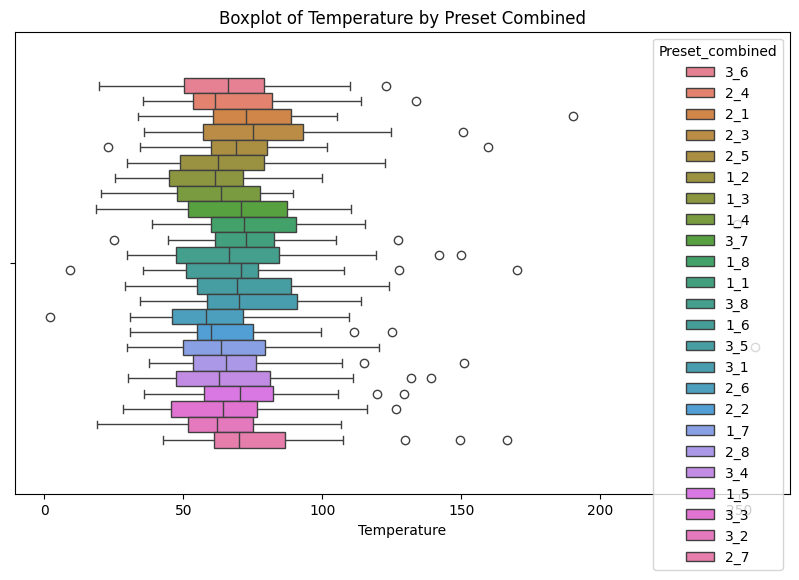

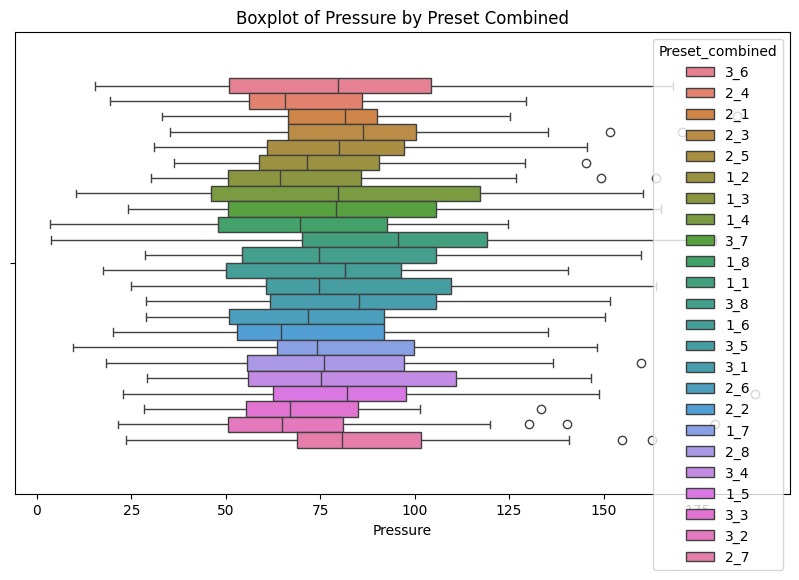

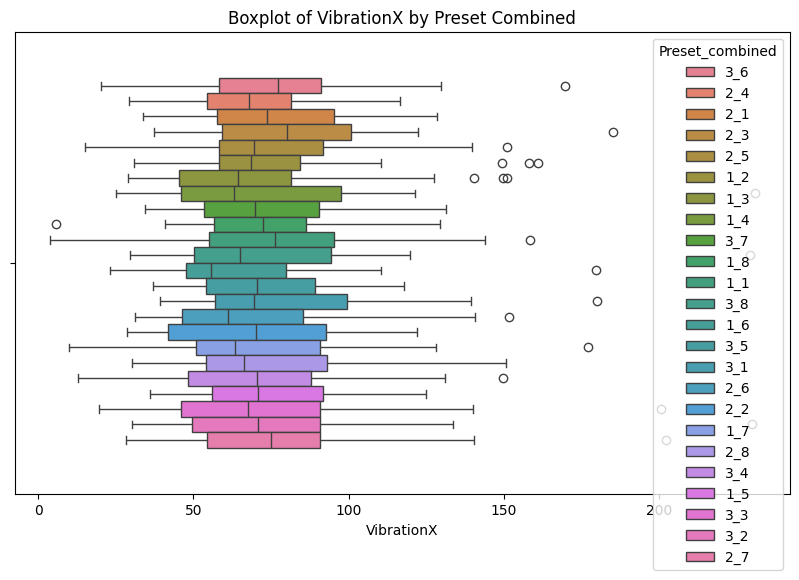

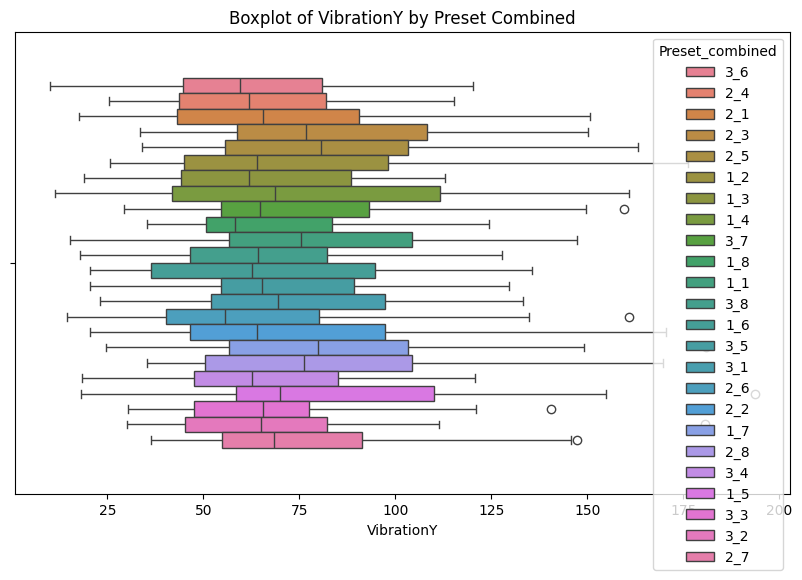

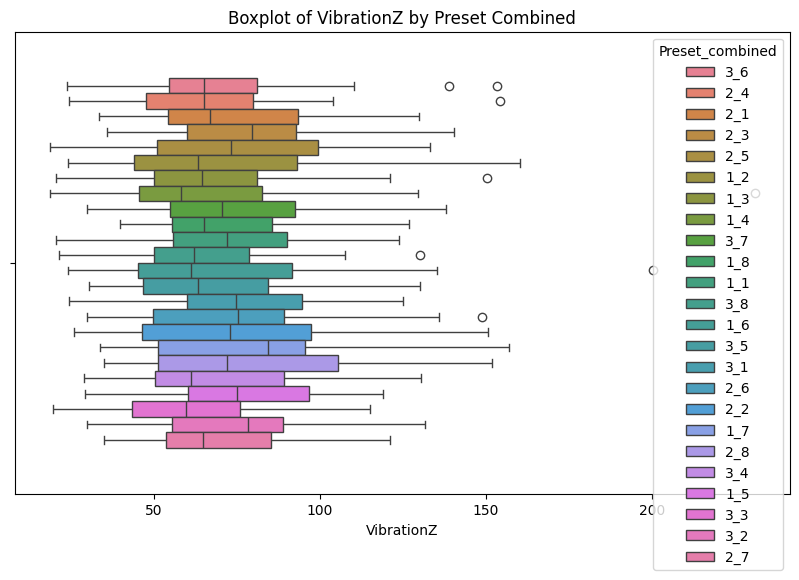

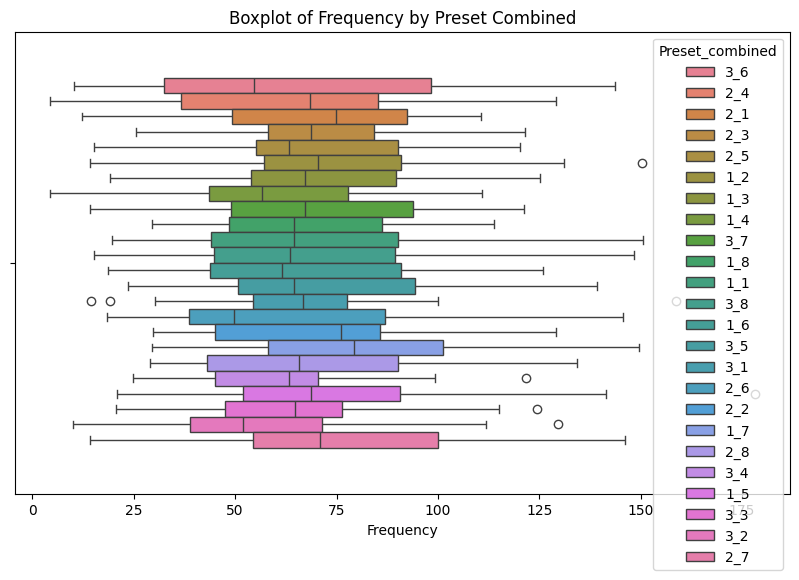

In [106]:
for i in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(hue='Preset_combined', x=i, data=df)
    plt.title(f'Boxplot of {i} by Preset Combined')
    plt.show()